### Imports

In [1]:
# Std & 3P libs
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from tabulate import tabulate
# Import models
from models.generative_model import GenerativeModel
from models.logistic_regression import LogisticRegression
from models.linear_regression import LinearRegression
from models.qda_model import QDAModel

In [2]:
# Import data
data = {}
for l in "ABC":
    data_train = pd.read_csv("data/classification"+ l +".train", sep="\t", names=["x1", "x2", "y"])
    data_test = pd.read_csv("data/classification"+ l +".test", sep="\t", names=["x1", "x2", "y"])
    data[l] = (data_train, data_test)

### Utils

In [3]:
# Plot distrubtion and decision boundary
def plot_distribution(model, data, data_name):
    class0 = data[data.y == 0][["x1", "x2"]]
    class1 = data[data.y == 1][["x1", "x2"]]
    plt.scatter(class0.x1, class0.x2, color='r')
    plt.scatter(class1.x1, class1.x2, color='b')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(data_name)
    plt.axis([np.min(data.x1)-1, np.max(data.x1)+1, np.min(data.x2)-1, np.max(data.x2)+1])
    if model.name == "qda model":
        X, Y, grid = model.get_boundary(data)
        plt.contour(X, Y, model.predict(grid).reshape(X.shape), 
                     colors = ('black'), alpha = 0.3)
        plt.legend(["Class 0", "Class 1"])
    else:
        x,y = model.get_boundary(data)
        plt.plot(x,y, color='y')
        plt.legend(["Boundary", "Class 0", "Class 1"])
    plt.savefig("graphics/" + "_".join(model.name.split()) + "_" + "_".join(data_name.split()) + '.png')
    plt.show()

In [4]:
def score_of_misclassification(model):
    errors = []
    for l in ["A", "B", "C"]:
        train, test = data[l]
        trainX, trainY = np.array(train[["x1", "x2"]]), np.array(train["y"])
        testX, testY = np.array(test[["x1", "x2"]]), np.array(test["y"])
        model.fit(trainX, trainY)
        print(model.W)
        s1 = round((1 - model.score(trainX, trainY)) * 100, 2)
        s2 = round((1 - model.score(testX, testY)) * 100, 2)
        errors.append(["Data " + l] + [s1, s2])
        plot_distribution(model, train, "Training data "+ l)
        plot_distribution(model, test, "Test data "+ l)
    print(tabulate(errors, headers=["Train", "Test"]))

## Evaluation

### Generative model

In [5]:
gen_mod = GenerativeModel()

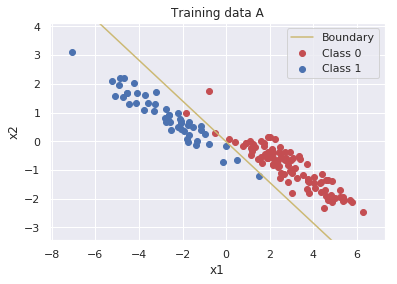

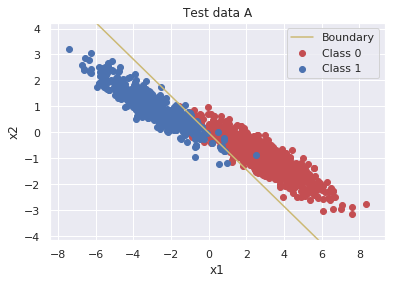

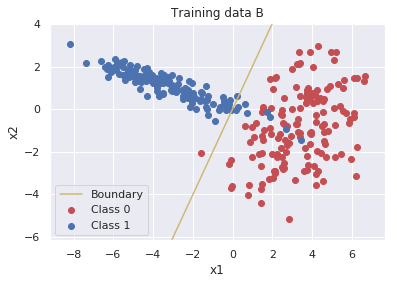

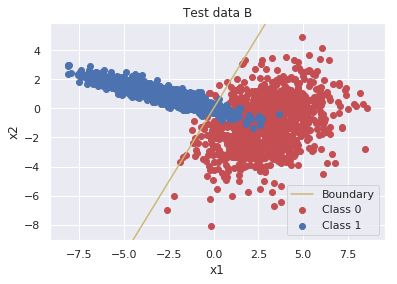

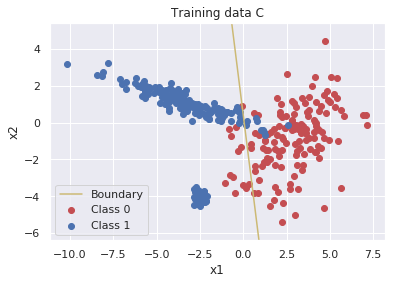

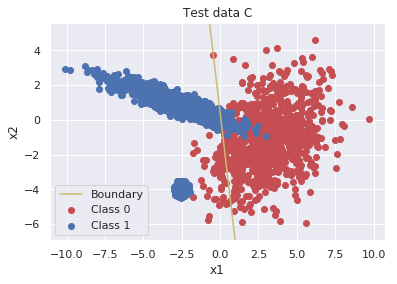

          Train    Test
------  -------  ------
Data A     1.33    2
Data B     3       4.15
Data C     5.5     4.23


In [6]:
score_of_misclassification(gen_mod)

### Logistic regression

In [5]:
log_mod = LogisticRegression()

[-1088.05451232 -1885.3814787   -182.13603424]


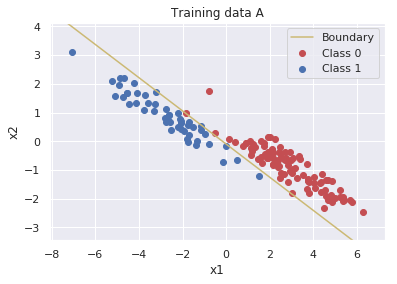

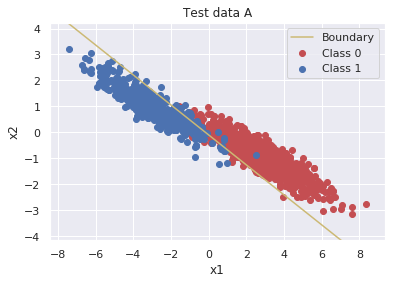

[-1.70518586  1.02378538  1.34959157]


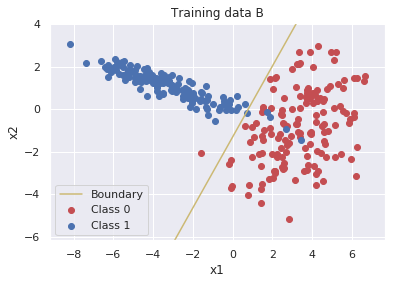

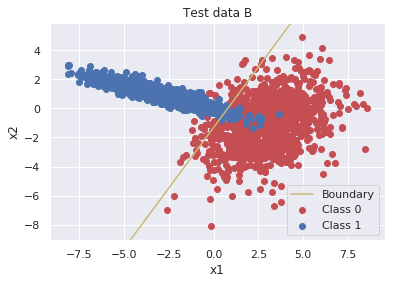

[-2.2032324   0.70926562  0.95918885]


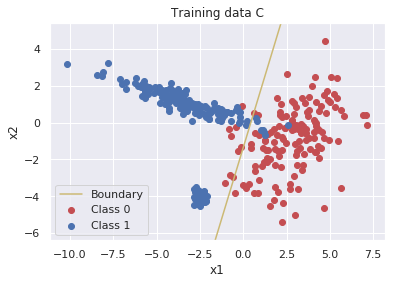

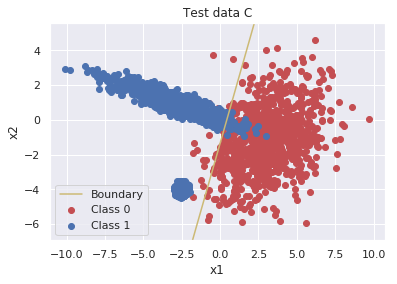

          Train    Test
------  -------  ------
Data A        0    3.47
Data B        2    4.3
Data C        4    2.27


In [6]:
score_of_misclassification(log_mod)

### Linear regression

In [9]:
lin_mod = LinearRegression()

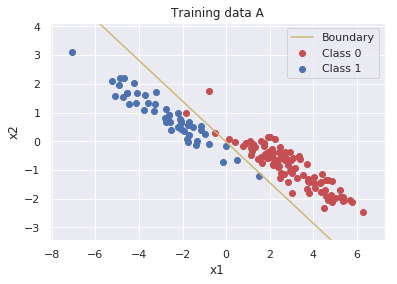

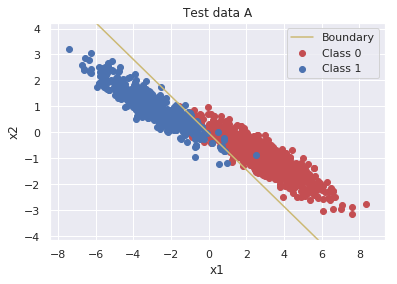

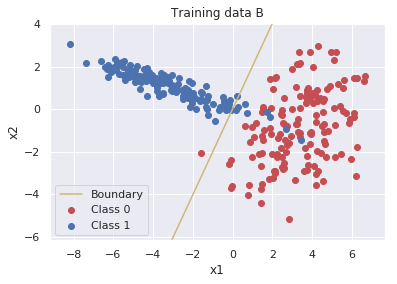

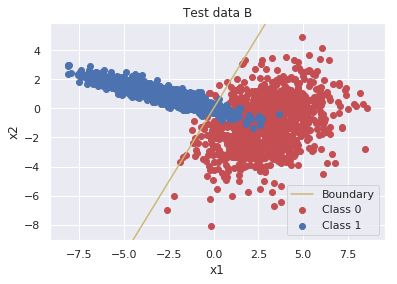

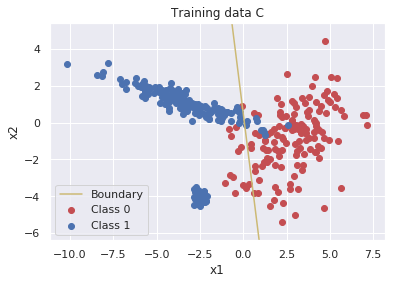

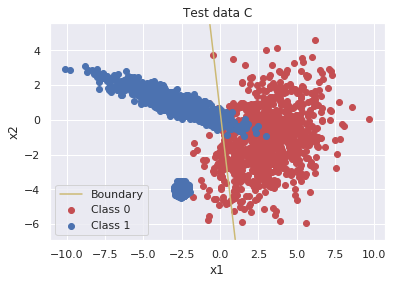

          Train    Test
------  -------  ------
Data A     1.33    2.07
Data B     3       4.15
Data C     5.5     4.23


In [10]:
score_of_misclassification(lin_mod)

### QDA model

In [11]:
qda_mod = QDAModel()

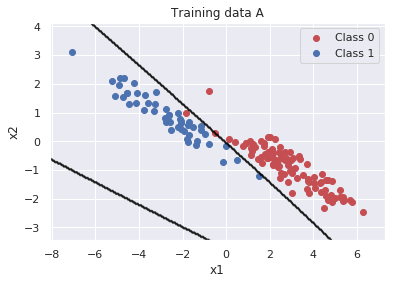

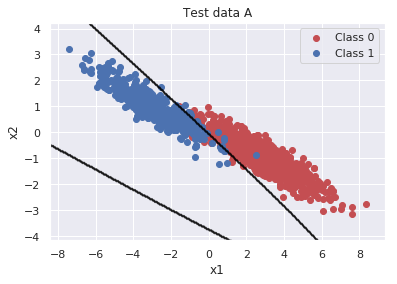

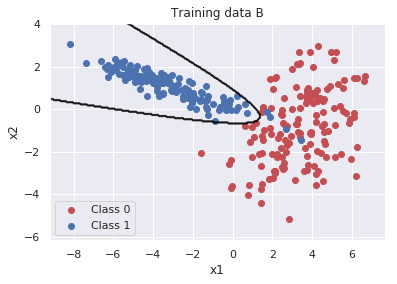

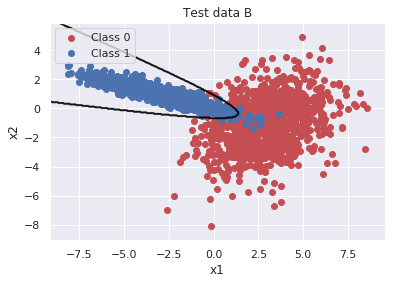

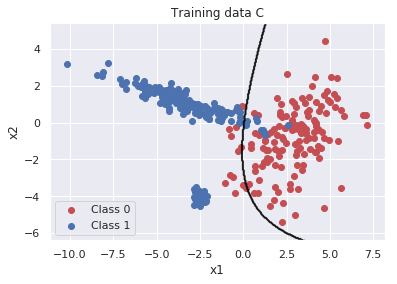

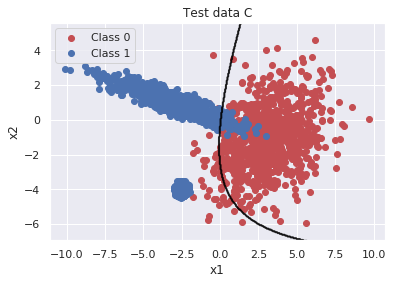

          Train    Test
------  -------  ------
Data A     0.67    2
Data B     1.33    2
Data C     5.25    3.83


In [12]:
score_of_misclassification(qda_mod)